<a href="https://colab.research.google.com/github/vikasreddy2409/python/blob/main/E_commerce_Customer_Data_For_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
#load the dataset
data= pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv (1).zip')

In [6]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [7]:
data.shape

(250000, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [12]:
data['Total Purchase Amount']
data['Purchase Date']

,Purchase Date
0,2020-09-08 09:38:32
1,2022-03-05 12:56:35
2,2022-05-23 18:18:01
3,2020-11-12 13:13:29
4,2020-11-27 17:55:11
...,...
249995,2023-08-10 13:39:06
249996,2021-11-23 01:30:42
249997,2020-07-02 14:04:48
249998,2020-12-30 02:02:40


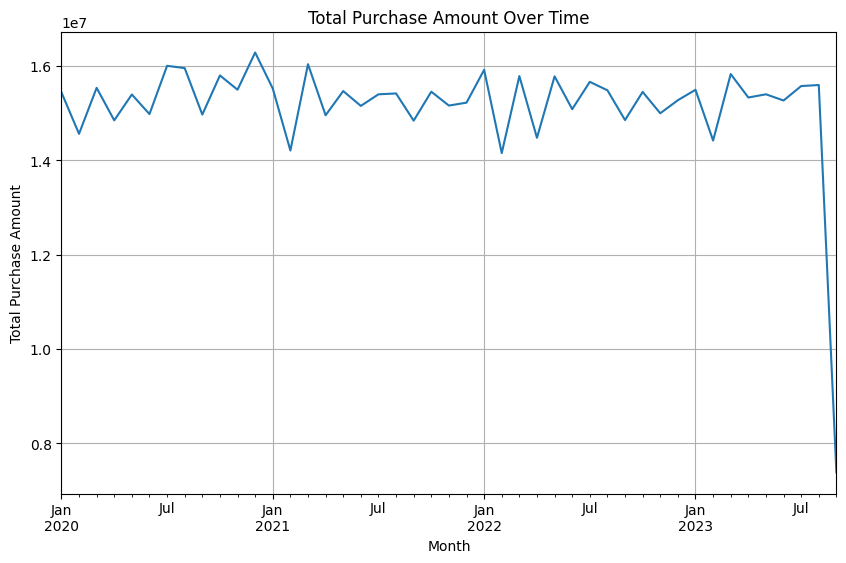

In [18]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
data['Month'] = data['Purchase Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total Purchase Amount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Total Purchase Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

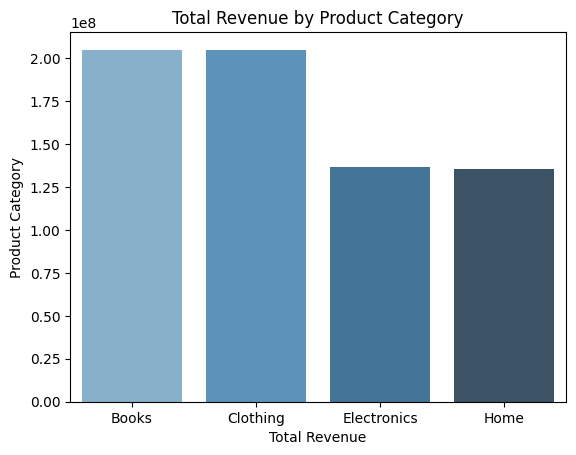

In [83]:

category_revenue = data.groupby('Product Category').agg(
total_revenue=('Total Purchase Amount', 'sum'),
total_quantity=('Quantity', 'sum'))
category_revenue.sort_values(by=['total_revenue'], ascending=False)
sns.barplot(x='Product Category', y='total_revenue', data=category_revenue_sorted, palette='Blues_d')
plt.title('Total Revenue by Product Category')
plt.ylabel('Product Category')
plt.xlabel('Total Revenue')
plt.show()


Text(0.5, 0, 'Payment Method')

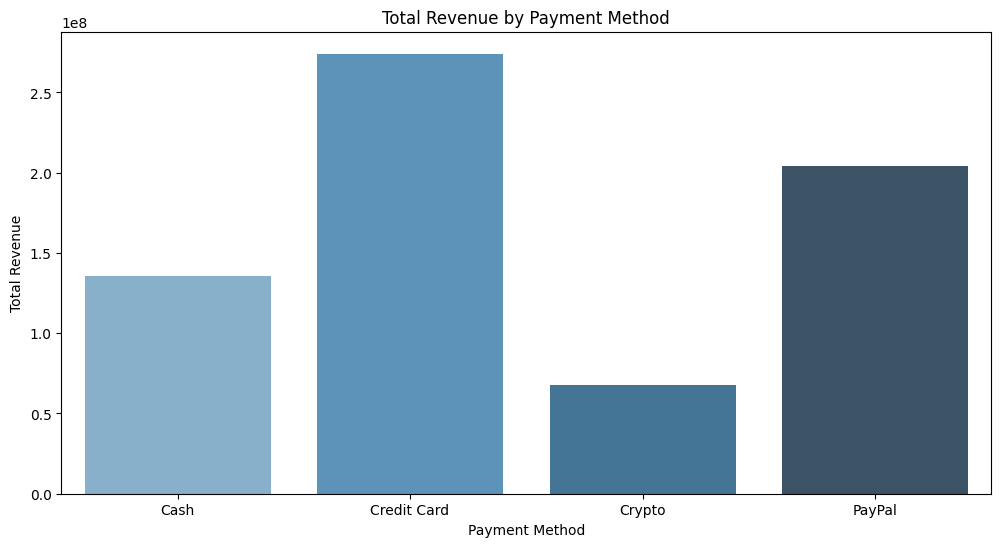

In [95]:
correlation = payment_method_analysis['total_revenue'].corr(payment_method_analysis['transaction_count'])


plt.figure(figsize=(12, 6)) # Changed plot to plt
sns.barplot(x=payment_method_analysis.index, y=payment_method_analysis['total_revenue'], palette='Blues_d')
plt.title('Total Revenue by Payment Method')
plt.ylabel('Total Revenue')
plt.xlabel('Payment Method')

In [133]:
Customer_ID = data.groupby('Customer ID').agg(total_purchase_amount=('Total Purchase Amount', 'sum'),Customer_Name=('Customer Name', 'first')).reset_index()
top_10_percent_revenue_threshold = Customer_ID['total_purchase_amount'].quantile(0.9)
print("Top 10% of Revenue Threshold:", top_10_percent_revenue_threshold)

Top 10% of Revenue Threshold: 22982.600000000006


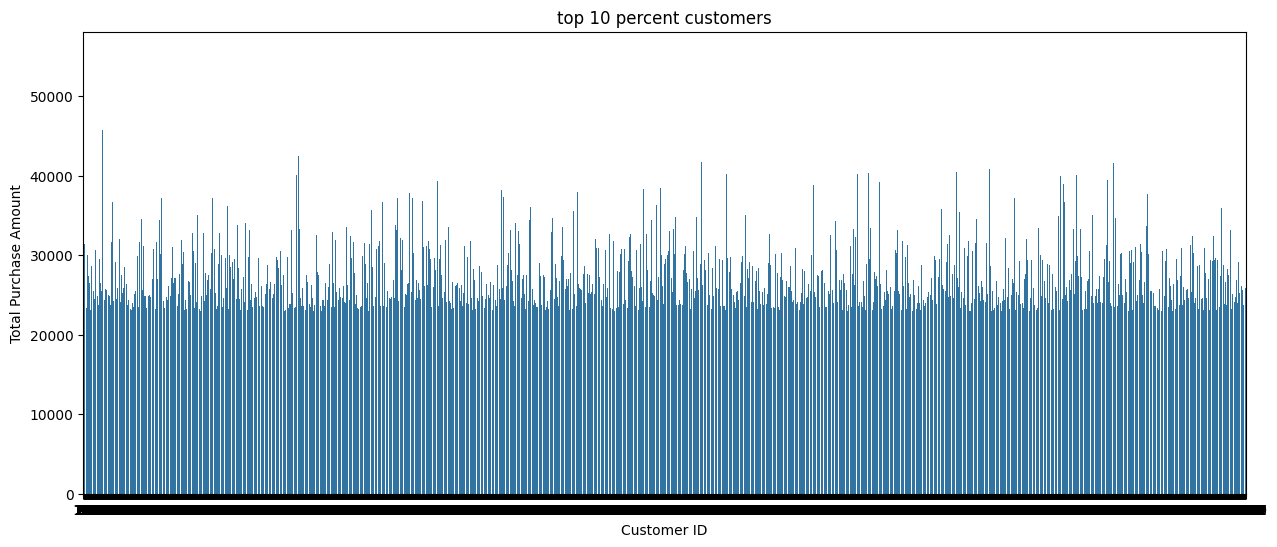

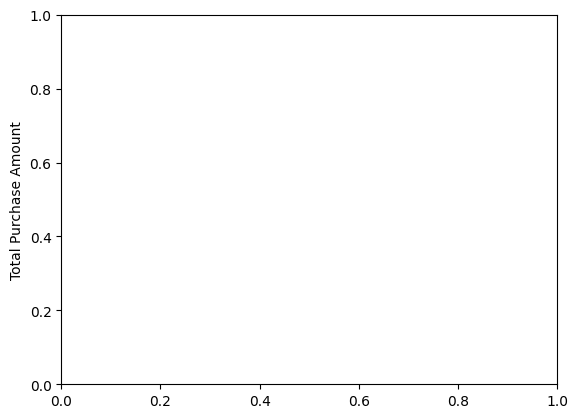

In [127]:

Customer_ID = data.groupby('Customer ID').agg(total_purchase_amount=('Total Purchase Amount', 'sum'),Customer_Name=('Customer Name', 'first')).reset_index()
top_10_percent_revenue_threshold = Customer_ID['total_purchase_amount'].quantile(0.9)
top_10_percent_customers = Customer_ID[Customer_ID['total_purchase_amount'] >= top_10_percent_revenue_threshold]
plt.figure(figsize=(15,6))
sns.barplot(x='Customer ID',y='total_purchase_amount',data=top_10_percent_customers)
plt.title('top 10 percent customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.show()
plt.ylabel('Total Purchase Amount')
plt.show()